# Εργαστηριακή Άσκηση 2. Μη επιβλεπόμενη μάθηση. 
## Σύστημα συστάσεων βασισμένο στο περιεχόμενο
## Σημασιολογική απεικόνιση δεδομένων με χρήση SOM 

In [1]:
!pip install --upgrade pip
!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --upgrade nltk
!pip install --upgrade scikit-learn
!pip install --upgrade joblib

     |████████████████████████████████| 1.7 MB 13.1 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     |████████████████████████████████| 15.7 MB 16.0 MB/s            
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 11.3 MB 15.6 MB/s            
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.4 which is incompatible.


     |████████████████████████████████| 1.5 MB 16.4 MB/s            
     |████████████████████████████████| 749 kB 44.0 MB/s            
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


##Data insertion

In [2]:
import pandas as pd

dataset_url = "https://drive.google.com/uc?export=download&id=1-tN5rC1QCgwqL67cvIXdMbtd-Xf9Xqow"
df_data_1 = pd.read_csv(dataset_url, sep='\t',  header=None, quoting=3)

Team seed == 40

In [3]:
import numpy as np

# Στο επόμενη γραμή βάλτε τον αριθμό της ομάδας στο εργαστήριο των νευρωνικών
team_seed_number = 40

movie_seeds_url = "https://drive.google.com/uc?export=download&id=1-oeMf7BFmiH70XObgC9WOTo-a9cDJZwP"
df_data_2 = pd.read_csv(movie_seeds_url, header=None)

# επιλέγεται 
my_index = df_data_2.iloc[team_seed_number,:].values

titles = df_data_1.iloc[:, [2]].values[my_index] # movie titles (string)
categories = df_data_1.iloc[:, [3]].values[my_index] # movie categories (string)
bins = df_data_1.iloc[:, [4]]
catbins = bins[4].str.split(',', expand=True).values.astype(float)[my_index] # movie categories in binary form (1 feature per category)
summaries =  df_data_1.iloc[:, [5]].values[my_index] # movie summaries (string)
corpus = summaries[:,0].tolist() # list form of summaries
corpus_df = pd.DataFrame(corpus) # dataframe version of corpus


In [4]:
ID = 999
print(titles[ID])
print(categories[ID])
print(catbins[ID])
print(corpus[ID])

['Convict 99']
['"Comedy",  "Black-and-white"']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.

# Εφαρμογή 1. Υλοποίηση συστήματος συστάσεων ταινιών βασισμένο στο περιεχόμενο
<img src="http://clture.org/wp-content/uploads/2015/12/Netflix-Streaming-End-of-Year-Posts.jpg" width="70%">

##TFID convertion

In [5]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as stopwords_english
from sklearn.feature_extraction.text import TfidfVectorizer


def tf_idf(mx_df, mn_df, my_stopwrods=list()):

  stopwords_film = ["movie", "film", "plot", "begins", "opens", "starts", "piece", "named", "woman", "women", "man", "men", "prologue", "help", "helping"]
  stopwords = list(stopwords_english) + list(my_stopwrods) + list(stopwords_film)# enhancing stopwords

  vectorizer = TfidfVectorizer(max_df=mx_df, min_df=mn_df, stop_words=stopwords, analyzer='word')
  vectorizer.fit(corpus)
  corpus_tf_idf = vectorizer.transform(corpus)
  print("Dimensions: ", corpus_tf_idf.shape, "\n")


  return corpus_tf_idf

Η συνάρτηση [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) όπως καλείται εδώ **δεν είναι βελτιστοποιημένη**. Οι επιλογές των μεθόδων και παραμέτρων της μπορεί να έχουν **δραματική επίδραση στην ποιότητα των συστάσεων** και είναι διαφορετικές για κάθε dataset. Επίσης, οι επιλογές αυτές έχουν πολύ μεγάλη επίδραση και στη **διαστατικότητα και όγκο των δεδομένων**. Η διαστατικότητα των δεδομένων με τη σειρά της θα έχει πολύ μεγάλη επίδραση στους **χρόνους εκπαίδευσης**, ιδιαίτερα στη δεύτερη εφαρμογή της άσκησης. Ανατρέξτε στα notebooks του εργαστηρίου και στο [FAQ](https://docs.google.com/document/d/1-E4eQkVnTxa3Jb0HL9OAs11bugYRRZ7RNWpu7yh9G4s/edit?usp=sharing) των ασκήσεων.

In [ ]:
print(tf_idf(1.0, 0))

#Suggestion system implementation

Το σύστημα συστάσεων που θα υλοποιήσετε θα είναι μια συνάρτηση content_recommender με τρία ορίσματα: target_movie, max_recommendations και corpus_type. Στην target_movie περνάμε το ID μιας ταινίας-στόχου για την οποία μας ενδιαφέρει να βρούμε παρόμοιες ως προς το περιεχόμενο (τη σύνοψη) ταινίες, max_recommendations στο πλήθος.
Υλοποιήστε τη συνάρτηση ως εξής:

    Για την ταινία-στόχο, θα υπολογίζετε την ομοιότητα συνημιτόνου της με όλες τις ταινίες της συλλογής σας όπως αυτές αναπαριστώνται στο corpus_type.με βάση την ομοιότητα συνημιτόνου που υπολογίσατε, δημιουργήστε ταξινομημένο πίνακα από το μεγαλύτερο στο μικρότερο, με τα indices (ID) των ταινιών.
    
    Για την ταινία-στόχο εκτυπώστε: id, τίτλο, σύνοψη, κατηγορίες (categories)
    
    Για τις max_recommendations ταινίες (πλην της ίδιας της ταινίας-στόχου που έχει cosine similarity 1 με τον εαυτό της) με τη μεγαλύτερη ομοιότητα συνημιτόνου (σε φθίνουσα σειρά), τυπώστε σειρά σύστασης (1 πιο κοντινή, 2 η δεύτερη πιο κοντινή κλπ), ομοιότητα συνημιτόνου, id, τίτλο, σύνοψη, και κατηγορίες (categories)


In [7]:
# function that prints movie info
def print_movie(ID):
  print("ID: ", ID)
  print("Title: ", ', '.join(titles[ID]))
  print("Categories: ", ', '.join(categories[ID]))
  print("Summary:\n", corpus[ID], "\n")

In [11]:
from sklearn.metrics.pairwise import linear_kernel

def content_recommender(ID, max_recommendations, corpus_tf_idf):
  cosine_similarities = linear_kernel(corpus_tf_idf[ID], corpus_tf_idf).flatten()  # calculating cosine similarities using sparse matrices

  cosine_similarities = (-cosine_similarities).argsort()  # sorting the array and saving movies based on ID's

  print_movie(ID)  # print target movie info

  for i in range(1, max_recommendations+1):   # print recommendations
    print("Place:", i)
    print_movie(cosine_similarities[i])

In [12]:
corpus_type = tf_idf(1.0, 0)

Dimensions:  (5000, 48562) 



In [13]:
content_recommender(1, 5, corpus_type)

ID:  1
Title:  Restless
Categories:  "Comedy",  "World cinema",  "Chinese Movies"
Summary:
 Leah  is a translator who is traveling international cities in search of romance and closure with her estranged boyfriend Jeff. She eventually settles in Beijing, China, where she meets and develops a fixation on Master Sun Zhan , who teaches here a Chinese game called weiqi. When her relationship with Master Sun Zhan takes a turn for the worse, Leah decides to focus on getting revenge on Jeff. Richard  is a shiftless Chinese-American whose family sends him to Beijing with his grandfather's ashes. Eventually Leah and Richard's paths cross and a romance develops. 

Place: 1
ID:  2737
Title:  Eyes of Fire
Categories:  "Horror"
Summary:
 The film takes place in the year 1750 on the American frontier during the colonial days, before the United States declared its independence. A group of pioneers narrowly escape persecution when their preacher is accused of adultery and polygamy. The preacher, Will 

#Utilization

Αφού υλοποιήσετε τη συνάρτηση content_recommender χρησιμοποιήστε την για να βελτιστοποιήσετε την TfidfVectorizer. Συγκεκριμένα, αρχικά μπορείτε να δείτε τι επιστρέφει το σύστημα για τυχαίες ταινίες-στόχους και για ένα μικρό max_recommendations (2 ή 3). Αν σε κάποιες ταινίες το σύστημα μοιάζει να επιστρέφει σημασιολογικά κοντινές ταινίες σημειώστε το ID τους. Δοκιμάστε στη συνέχεια να βελτιστοποιήσετε την TfidfVectorizer για τα συγκεκριμένα ID ώστε να επιστρέφονται σημασιολογικά κοντινές ταινίες για μεγαλύτερο αριθμό max_recommendations. Παράλληλα, όσο βελτιστοποιείτε την TfidfVectorizer, θα πρέπει να λαμβάνετε καλές συστάσεις για μεγαλύτερο αριθμό τυχαίων ταινιών.

Ταυτόχρονα, μια αντίρροπη κατά κάποιο τρόπο κατεύθυνση της βελτιστοποίησης είναι να χρησιμοποιείτε τις παραμέτρους του TfidfVectorizer έτσι ώστε να μειώνονται οι διαστάσεις του Vector Space Model μέχρι το σημείο που θα αρχίσει να εμφανίζονται επιπτώσεις στην ποιότητα των συστάσεων.

In [14]:
def similar_movies(count):
  movie_list = []

  for i in range(0, 5000): # for all movies
    cnt = count

    cosine_similarities = linear_kernel(corpus_tf_idf[i], corpus_tf_idf).flatten()  # find best matches
    cosine_similarities = (-cosine_similarities).argsort()
    
    categs = categories[i][0]
    categs = categs.split(",")
    
    for category in categs: # find categories similar between th movie and the 3 top matches
      if category.lstrip(' ') in (categories[cosine_similarities[1]][0]) and category.lstrip(' ') in (categories[cosine_similarities[2]][0]) and category.lstrip(' ') in (categories[cosine_similarities[3]][0]):
        cnt = cnt - 1
      if cnt == 0: # if count similar categories are found append the movie to movie_list
        movie_list.append(i)
        break

  return movie_list

we add to stop words list English names to avoid the resemblansh of the movies been based on common names

In [15]:
import urllib.request 
import string

# female english names
target_url = "http://www.cs.cmu.edu/Groups/AI/util/areas/nlp/corpora/names/female.txt"
response = urllib.request.urlopen(target_url).read().decode()
lines_temp = response.split('\n')
names = []

for line in lines_temp:
  if line and line[0] != "#":
    names.append(line.lower())

# male english names
target_url = "http://www.cs.cmu.edu/Groups/AI/util/areas/nlp/corpora/names/male.txt"
response = urllib.request.urlopen(target_url).read().decode()
lines_temp = response.split('\n')

for line in lines_temp:
  if line and line[0] != "#":
    names.append(line.lower())


In [18]:
corpus_tf_idf = tf_idf(1.0, 0, names)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['luc', 'mar', 'zsa'] not in stop_words.
  % sorted(inconsistent)


Dimensions:  (5000, 45559) 



We see a decrease at the collumns , about 3000

In [19]:
content_recommender(10, 3, corpus_tf_idf)

ID:  10
Title:  Como Esquecer
Categories:  "Drama"
Summary:
 Julia  is a professor of English literature who is abandoned by her girlfriend after a relationship that lasted over ten years. Because of the separation, Julie moves to Rio de Janeiro and lives with her best friend, Hugo , who is gay, and Lisa . In the new work, Julia ends up attracting the interest of two students, and it is Helena  who is after the teacher, although she did not feel prepared for a new relationship. 

Place: 1
ID:  4711
Title:  Only When I Dance
Categories:  "Documentary"
Summary:
 Only When I Dance tells the story of two teenagers, Irlan and Isabela, who pursue their dreams of becoming professional ballet dancers as a way to escape the violent slums of Rio de Janeiro. 

Place: 2
ID:  3855
Title:  Love, in between
Categories:  "Romance Film",  "Drama"
Summary:
 When the wife of a university professor discovered her husband is having affair with his student she meets his lover they become friends and the rel

#min_df

Ο αποκλεισμός των λιγότερο συχνών λέξεων βοηθά σε κάποιες περιπτώσεις καθώς αποκλείει σπάνιες λέξεις που δεν προσφέρουν στο νόημα, ενώ σε άλλες κάνει το ίδιο αλλά με λέξεις που συσχετίζουν μικρό αριθμό ταινιών της ίδιας κατηγορίας οδηγώντας σε χειρότερα αποτελέσματα.

In [20]:
corpus_tf_idf = tf_idf(1.0, 2, names)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['luc', 'mar', 'zsa'] not in stop_words.
  % sorted(inconsistent)


Dimensions:  (5000, 22761) 



In this case we succeded better results with that method 

In [21]:
content_recommender(46, 3, corpus_tf_idf)

ID:  46
Title:  Rajakumaran
Categories:  "Drama"
Summary:
 Rajakumaran ([[Prabhu  is the son of the village chief ([[Vijayakumar . Yuvaraj  hates Rajakumaran and his village. Selvi  and Vaidehi  are in love with their cousin Rajakumaran but he chooses Vaidehi. Selvi decides to sacrifice her love, her father Selvaraj  refuses to give his property to village people as promised and his only request is that Rajakumaran gets married with Selvi. Selvi convinced Rajakumaran to lie, he lies to her father and he gives his property. Vaidehi committed suicide and Rajakumaran reveals his lie. One day, some goons decide to put a bomb and Rajakumaran saves the village. The village thinks that the culprit was Thangaraj  because he wanted to revenge Rajakumaran after his lie. Angry, Thangaraj insults Rajakumaran's father in public and Rajakumaran's father died. Yuvaraj asks to Selvaraj and Thangaraj to marry Selvi, and they accept. The village was against the marriage. A man  came and said that a deaf

In [23]:
corpus_tf_idf = tf_idf(1.0, 15, names)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['luc', 'mar', 'zsa'] not in stop_words.
  % sorted(inconsistent)


Dimensions:  (5000, 5596) 



In [24]:
content_recommender(46, 3, corpus_tf_idf)

ID:  46
Title:  Rajakumaran
Categories:  "Drama"
Summary:
 Rajakumaran ([[Prabhu  is the son of the village chief ([[Vijayakumar . Yuvaraj  hates Rajakumaran and his village. Selvi  and Vaidehi  are in love with their cousin Rajakumaran but he chooses Vaidehi. Selvi decides to sacrifice her love, her father Selvaraj  refuses to give his property to village people as promised and his only request is that Rajakumaran gets married with Selvi. Selvi convinced Rajakumaran to lie, he lies to her father and he gives his property. Vaidehi committed suicide and Rajakumaran reveals his lie. One day, some goons decide to put a bomb and Rajakumaran saves the village. The village thinks that the culprit was Thangaraj  because he wanted to revenge Rajakumaran after his lie. Angry, Thangaraj insults Rajakumaran's father in public and Rajakumaran's father died. Yuvaraj asks to Selvaraj and Thangaraj to marry Selvi, and they accept. The village was against the marriage. A man  came and said that a deaf

In this case althouth we see that we don't only get drama recommendations

with continuous trys we conclude that the best result is taken when min-df is 5/6

In [27]:
corpus_tf_idf = tf_idf(1.0, 6, names)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['luc', 'mar', 'zsa'] not in stop_words.
  % sorted(inconsistent)


Dimensions:  (5000, 10673) 



In [28]:
content_recommender(46, 3, corpus_tf_idf)

ID:  46
Title:  Rajakumaran
Categories:  "Drama"
Summary:
 Rajakumaran ([[Prabhu  is the son of the village chief ([[Vijayakumar . Yuvaraj  hates Rajakumaran and his village. Selvi  and Vaidehi  are in love with their cousin Rajakumaran but he chooses Vaidehi. Selvi decides to sacrifice her love, her father Selvaraj  refuses to give his property to village people as promised and his only request is that Rajakumaran gets married with Selvi. Selvi convinced Rajakumaran to lie, he lies to her father and he gives his property. Vaidehi committed suicide and Rajakumaran reveals his lie. One day, some goons decide to put a bomb and Rajakumaran saves the village. The village thinks that the culprit was Thangaraj  because he wanted to revenge Rajakumaran after his lie. Angry, Thangaraj insults Rajakumaran's father in public and Rajakumaran's father died. Yuvaraj asks to Selvaraj and Thangaraj to marry Selvi, and they accept. The village was against the marriage. A man  came and said that a deaf

Για να επιβεβαιώσουμε την σωστή τιμή του min_df, η οποία επηρεάζει τη διαστατικότητα του πίνακα και άρα και το χρόνο εκπαίδευσης εκτυπώνουμε τα μεγέθη των λιστών που δίνει η συνάρτηση similar_movies που φτιάξαμε, συναρτήσει της min_df, για αριθμό κοινών ειδών μεταξύ των ταινιών 2 και 3.

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['luc', 'mar', 'zsa'] not in stop_words.
  % sorted(inconsistent)


Dimensions:  (5000, 45559) 



/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['luc', 'mar', 'zsa'] not in stop_words.
  % sorted(inconsistent)


Dimensions:  (5000, 22761) 



/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['luc', 'mar', 'zsa'] not in stop_words.
  % sorted(inconsistent)


Dimensions:  (5000, 16968) 



/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['luc', 'mar', 'zsa'] not in stop_words.
  % sorted(inconsistent)


Dimensions:  (5000, 13961) 



/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['luc', 'mar', 'zsa'] not in stop_words.
  % sorted(inconsistent)


Dimensions:  (5000, 12032) 



/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['luc', 'mar', 'zsa'] not in stop_words.
  % sorted(inconsistent)


Dimensions:  (5000, 10673) 



/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['luc', 'mar', 'zsa'] not in stop_words.
  % sorted(inconsistent)


Dimensions:  (5000, 9653) 



/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['luc', 'mar', 'zsa'] not in stop_words.
  % sorted(inconsistent)


Dimensions:  (5000, 8792) 



/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['luc', 'mar', 'zsa'] not in stop_words.
  % sorted(inconsistent)


Dimensions:  (5000, 8111) 



/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['luc', 'mar', 'zsa'] not in stop_words.
  % sorted(inconsistent)


Dimensions:  (5000, 7551) 



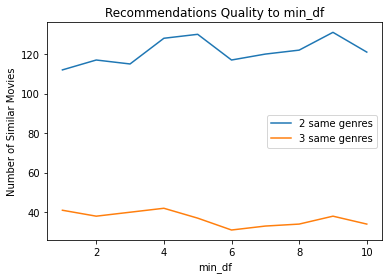

In [29]:
import matplotlib.pyplot as plt

length_2 = []
length_3 = []
min_dfs = [1,2,3,4,5,6,7,8,9,10]
for min_df in min_dfs:
  corpus_tf_idf = tf_idf(1.0, min_df, names)
  temp = []
  length_2.append(len(similar_movies(2)))
  length_3.append(len(similar_movies(3)))
  

plt.plot(min_dfs, length_2)
plt.plot(min_dfs, length_3)
plt.xlabel('min_df')
plt.ylabel('Number of Similar Movies')
plt.title('Recommendations Quality to min_df')
plt.legend(['2 same genres', '3 same genres'], loc='center right')
plt.show()

In [30]:
print(length_2)
print(length_3)

[112, 117, 115, 128, 130, 117, 120, 122, 131, 121]
[41, 38, 40, 42, 37, 31, 33, 34, 38, 34]


Παρατηρούμε γενικά μείωση της ποιότητας των επιλογών με την αύξηση του min_df, με μία μικρή αύξηση όμως στις τιμές για count = 2 και min_df μεταξύ 4 και 8. Για count = 3 παρατηρείται μείωση της ποιότητας. Έτσι οι παρατηρήσεις μας επιβεβαιώνονται.

#10 Good recommendations

In [31]:
corpus_tf_idf = tf_idf(1.0, 6, names)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['luc', 'mar', 'zsa'] not in stop_words.
  % sorted(inconsistent)


Dimensions:  (5000, 10673) 



In [34]:
content_recommender(12, 5, corpus_tf_idf)

ID:  12
Title:  Fire Sale
Categories:  "Comedy",  "Absurdism"
Summary:
 Benny Fikus decides to cash in on his business' fire insurance by committing arson. Benny plans to have Sherman, who is in a mental hospital believing that World War II is still being fought, escape and burn down Benny's failing clothing store which he has made Sherman believe is a Nazi military headquarters. During a vacation trip with Marion, Benny has a heart attack, and his sons Ezra and Russel take over the store. The low self-esteemed Russell wants to expand the store and marry his girlfriend, while Ezra needs money to adopt an orphaned 6'8" African-American teenage boy named Booker T . Ezra needs Booker T. to play on the high-school basketball team he coaches because he has won a total of two games in seven years as a coach and is in danger of losing his job. Russell discovers that his father is bankrupt, with his only asset being the surrender value on the store's fire insurance policy. Russell cashes in th

In [39]:
content_recommender(856, 5, corpus_tf_idf)

ID:  856
Title:  Chaand Kaa Tukdaa
Categories:  "Crime Fiction",  "Comedy film",  "Action",  "Drama",  "Romance Film"
Summary:
 Shyam, a wealthy bachelor in London, returns to India and meets the girl, Radha, of his dreams. But Radha is a helpless pawn controlled by Shyam's evil uncle and Shyam's father's murderer. The two eye Shyam's wealth and estate and nothing can stop them in their path to obtain it--and their plan to kill Shyam. 

Place: 1
ID:  2134
Title:  Kashmeeram
Categories:  "Thriller",  "Action",  "Bollywood"
Summary:
 Terrorists kill Malayali-born Officer of Home Ministry of India Rajan Varma's nephew. Anti-terrorism police led by Shyam  is appointed to protect Rajan's sister Usha Varma ([[Sharada  and her daughter Manasi  without informing them about Unni's death. Shyam kills Manasi's boyfriend when he was trying to trespass her home and so they starts hating Shyam. Manasi does not know that her boyfriend was a terrorist and was trying to kill her and her mom. The terror

In [40]:
content_recommender(4814, 5, corpus_tf_idf)

ID:  4814
Title:  In My Genes
Categories:  "Drama",  "Documentary"
Summary:
 How does one live as a white person in a dominantly black society? What does one feel being one of the most visible persons and, probably, one of the most ignored? Agnes, an albino woman in Kenya, feels it daily. Ever since she was born, she has had to deal with the prejudices that surround albinos. In My Genes bears witness to the lives of eight people who suffer discrimination due to a simple genetic anomaly. 

Place: 1
ID:  2602
Title:  One More Chance
Categories:  "Short Film",  "Drama"
Summary:
 Finding work when you have just got out of prison is hard — especially acting work. Devon, an ex-convict recently released from prison, is trying to take back his life and find a job but has many problems with the prejudices and rejection of the society. Jean-Paul is a French manic depressive who has to deal with the accusations made by his ex-wife. When these two characters met, they become friends and eventually

In [41]:
content_recommender(4912, 6, corpus_tf_idf)

ID:  4912
Title:  Alias Jesse James
Categories:  "Action/Adventure",  "Western",  "Screwball comedy",  "Comedy",  "Comedy Western"
Summary:
 Milford Farnsworth  is a bumbling insurance agent who unknowingly sells a life insurance policy to the outlaw Jesse James . Farnsworth is sent out West to protect the insurance company's investment by "protecting" James. James has his own plans to have Farnsworth killed while dressed as the outlaw, so that he and his soon to be "widow" Cora Lee Collins  can collect on the $100,000 insurance policy. Farnsworth avoids several attempts on his life while he and Collins fall in love with each other. After the last attempt is made on his life, Farnsworth impersonates the justice of the peace who is supposed to marry James and Collins. When Farnsworth and Collins make a run for it, they end up in a gun battle with the James Gang where several Western heroes make their cameos to surreptitiously help Farnsworth. In the end Farnsworth is victorious, marries

In [42]:
content_recommender(60, 5, corpus_tf_idf)

ID:  60
Title:  Vellaripravinte Changathi
Categories:  "Romance Film",  "Drama"
Summary:
 Vellaripravinte Changathi is based on the story of film-maker Augustine Joseph who made a Malayalam film in 1966. However, due to some reasons, the film did not make it to the theatres. The 1960s-70s was a period dominated by Prem Nazir, Sathyan, Sheela and others. Unluckily Augustine Joseph was not able to get the film released. Later he commits suicide due to the debts from the production of the film. After years his son revels the original prints of the film from Gemini Lab and sees it. Later he goes on with releasing the film and tries to find the people who did the characters. The film is well appreciated for the way of narration and picturisation which makes the viewer feels that they are actually watching an old Black and white movie of the 60-70s. 

Place: 1
ID:  3330
Title:  Ajab Prem Ki Ghazab Kahani
Categories:  "Romantic comedy",  "World cinema",  "Musical",  "Drama",  "Comedy",  "Roma

In [45]:
content_recommender(455, 4, corpus_tf_idf)

ID:  455
Title:  The Hangover: Part II
Categories:  "Buddy film",  "Comedy",  "Absurdism"
Summary:
  Two years after their escapade in Las Vegas, Stu Price, Phil Wenneck, Alan Garner and Doug Billings travel to Thailand to celebrate Stu's impending wedding to Lauren. Much to Alan's dismay, they are joined by Lauren's younger brother, Teddy. During Lauren's father's toast, he shows his disapproval of Stu by comparing him to congee. At the end of the night, Stu hesitantly joins Phil, Doug, Alan and Teddy for a beer. Sitting at a campfire and roasting marshmallows, the group toast to Stu and Lauren's future happiness. The following morning, Phil, Stu and Alan, along with flamboyant gangster Leslie Chow - whom Alan befriended after Las Vegas - and a chain-smoking capuchin monkey, awaken in a dirty hotel room in Bangkok. Stu has a face tattoo , and Alan's head is completely shaved. However, they cannot find Teddy, only discovering his severed finger. Chow begins recalling the events of the 

In [46]:
content_recommender(248, 6, corpus_tf_idf)

ID:  248
Title:  Lone Star
Categories:  "Western",  "Black-and-white"
Summary:
 Devereaux Burke gets a personal request from former President Andrew Jackson to help keep Texas from entering into annexation with Mexico. The movement is gaining favor because it is mistakenly believed that Texas pioneer Sam Houston supports it. The opposition leader is wealthy rancher Thomas Craden, but when Dev is ambushed by Comanche, it is Craden who comes to his rescue. Martha Ronda, who loves Craden and runs the Austin newspaper, does not know Dev is anti-annexation when she and Craden host a number of senators at their home for dinner. When they won't all agree to vote his way, Craden then refuses them permission to leave. Dev gets a signed letter from Sam Houston of his actual position, but the ink smears when he falls into a river, fleeing from Craden's men. He has difficulty persuading Martha, who publishes an incorrect story about Houston's position, but ultimately he wins her over and saves the

In [47]:
content_recommender(749, 5, corpus_tf_idf)

ID:  749
Title:  Seizure
Categories:  "Monster movie",  "Horror",  "Surrealism",  "Psychological thriller",  "Satire",  "Slasher"
Summary:
 Horror writer Edmund Blackstone  sees his recurring nightmare come to chilling life one weekend as one by one, his friends and family are killed by three villains, led by Martine Beswick as the Queen of Evil, and Hervé Villechaize as Spider. 

Place: 1
ID:  4410
Title:  Spider-Man
Categories:  "Adventure",  "Superhero movie",  "Action/Adventure",  "Fantasy",  "Coming of age",  "Action"
Summary:
  High-school senior Peter Parker  lives in Forest Hills, a quiet suburban neighborhood in the New York City borough of Queens, with his Uncle Ben  and Aunt May . He secretly loves Mary Jane Watson , a warm-hearted girl next door, but is too shy to approach her. His best friend Harry Osborn  is the son of Dr. Norman Osborn , president of the Oscorp manufacturing corporation, which is working to win a contract to supply weapons to the United States Army.  On 

In [48]:
content_recommender(1446, 6, corpus_tf_idf)

ID:  1446
Title:  I'm a Big Shot Now
Categories:  "Comedy",  "Animation"
Summary:
 The plot concerns a gangster bird, who sings the title song and likes to prove his toughness by beating up on cops without provocation. The hoodlum spots the Birdville Bank across the street from the saloon where he hangs out, and calls his gang together to rob the bank and make a quick getaway. In the ensuing chase, the avian police  capture him by shooting the floor out from the birdhouse which he uses as his hideout, leaving him to sing "I'm Just a Jailbird Now" from his jail cell. 

Place: 1
ID:  4881
Title:  Smart Alecks
Categories:  "Crime Fiction",  "Romance Film",  "Drama",  "Comedy film"
Summary:
 Hank leaves the East Side Kids to become an apprentice crook; his first job being the lookout during a bank robbery done by Mike and Butch. Hank is handed the pistol one of the crooks used to rob the bank with the events witnessed by Police Officer Regan and Danny's sister. Hiding from the police in th

## Tip: persistence αντικειμένων με joblib.dump


In [50]:
import joblib

joblib.dump(corpus_tf_idf, 'corpus_tf_idf.pkl', compress=True) 

['corpus_tf_idf.pkl']

In [51]:
!ls -lh

total 3.9M
-rw-r--r-- 1 root root 3.9M Dec  1 13:03 corpus_tf_idf.pkl
drwxr-xr-x 1 root root 4.0K Nov 18 14:36 sample_data


In [52]:
corpus_tf_idf = joblib.load('corpus_tf_idf.pkl')

# Εφαρμογή 2.  Τοπολογική και σημασιολογική απεικόνιση της ταινιών με χρήση SOM
<img src="https://drive.google.com/uc?export=download&id=1R1R7Ds9UEfhjOY_fk_3wcTjsM0rI4WLl" width="60%">

In [54]:
def build_final_set(corpus_tf_idf, doc_limit = 5000, tf_idf_only=False):
    # convert sparse tf_idf to dense tf_idf representation
    dense_tf_idf = corpus_tf_idf.toarray()[0:doc_limit,:]
    if tf_idf_only:
        # use only tf_idf
        final_set = dense_tf_idf
    else:
        # append the binary categories features horizontaly to the (dense) tf_idf features
        final_set = np.hstack((dense_tf_idf, catbins[0:doc_limit,:]))
        # η somoclu θέλει δεδομένα σε float32
    return np.array(final_set, dtype=np.float32)

In [55]:
final_set = build_final_set(corpus_tf_idf)

In [56]:
print(corpus_tf_idf.shape)
print(final_set.shape)

(5000, 10673)
(5000, 10995)


Τυπωνουμε τις (μη μηδενικες) τιμες ενος στοιχειου του final_set για να δουμε τι περιεχει. 

In [57]:
for i in range(len(final_set[0])):
    if final_set[0][i]!=0:
        print(final_set[0][i])

0.03414758
0.035620734
0.0519954
0.046648435
0.05275471
0.0486082
0.03224282
0.021575825
0.06680079
0.039976638
0.031619627
0.037216045
0.053603545
0.063672125
0.10720709
0.03908262
0.026189882
0.044837274
0.10824268
0.03174871
0.04148351
0.02470729
0.03491362
0.046336222
0.087096356
0.026973767
0.031969115
0.045391154
0.037284814
0.028163457
0.031125255
0.050681453
0.035473652
0.022091204
0.019785859
0.049570527
0.038617507
0.031165183
0.14308351
0.031662397
0.03711823
0.019769367
0.03525851
0.092626356
0.2079816
0.3885835
0.032575868
0.025267815
0.030123219
0.04043934
0.0342084
0.043391086
0.039976638
0.050681453
0.04011391
0.038075387
0.06447497
0.0519954
0.05403734
0.05053563
0.026011439
0.017787285
0.028740307
0.2128328
0.017338611
0.041155875
0.031368203
0.02729412
0.044077966
0.03022792
0.16548312
0.04099748
0.025704721
0.021164486
0.030625386
0.03592422
0.038617507
0.022896126
0.045391914
0.050104607
0.050681453
0.049570527
0.049570527
0.049073312
0.041475162
0.030737702
0.0310

##Training SOM

In [63]:
# install somoclu
!pip install --upgrade somoclu
# import sompoclu, matplotlib
import somoclu as som
import matplotlib
# we will plot inside the notebook and not in separate window
%matplotlib inline

In [66]:
n_rows, n_columns = 20,20
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
epochs = 100
filename = 'som' + str(n_rows) + 'x' + str(n_columns) + '@' + str(epochs) + 'e.pkl'